<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-11 04:53:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.6MB/s    in 2.7s    

2025-06-11 04:53:30 (55.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_3830/2873138683.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_3830/2873138683.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()


<Figure size 1000x600 with 0 Axes>

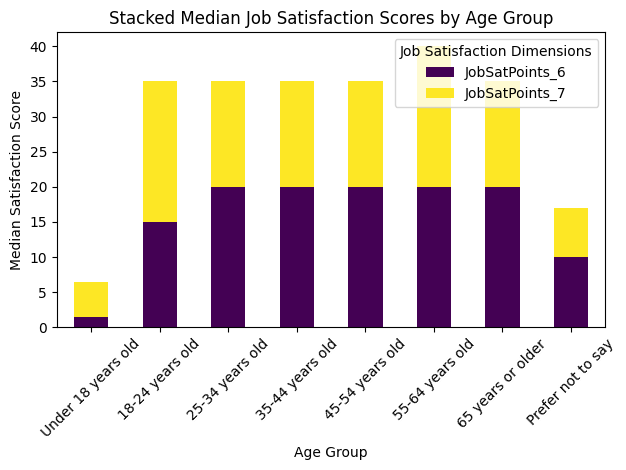

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 2: Define age order for consistency
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Step 3: Group by Age and compute median values
median_satisfaction = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Step 4: Plot stacked bar chart
plt.figure(figsize=(10, 6))
median_satisfaction.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Stacked Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Dimensions')
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_3830/4104210497.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

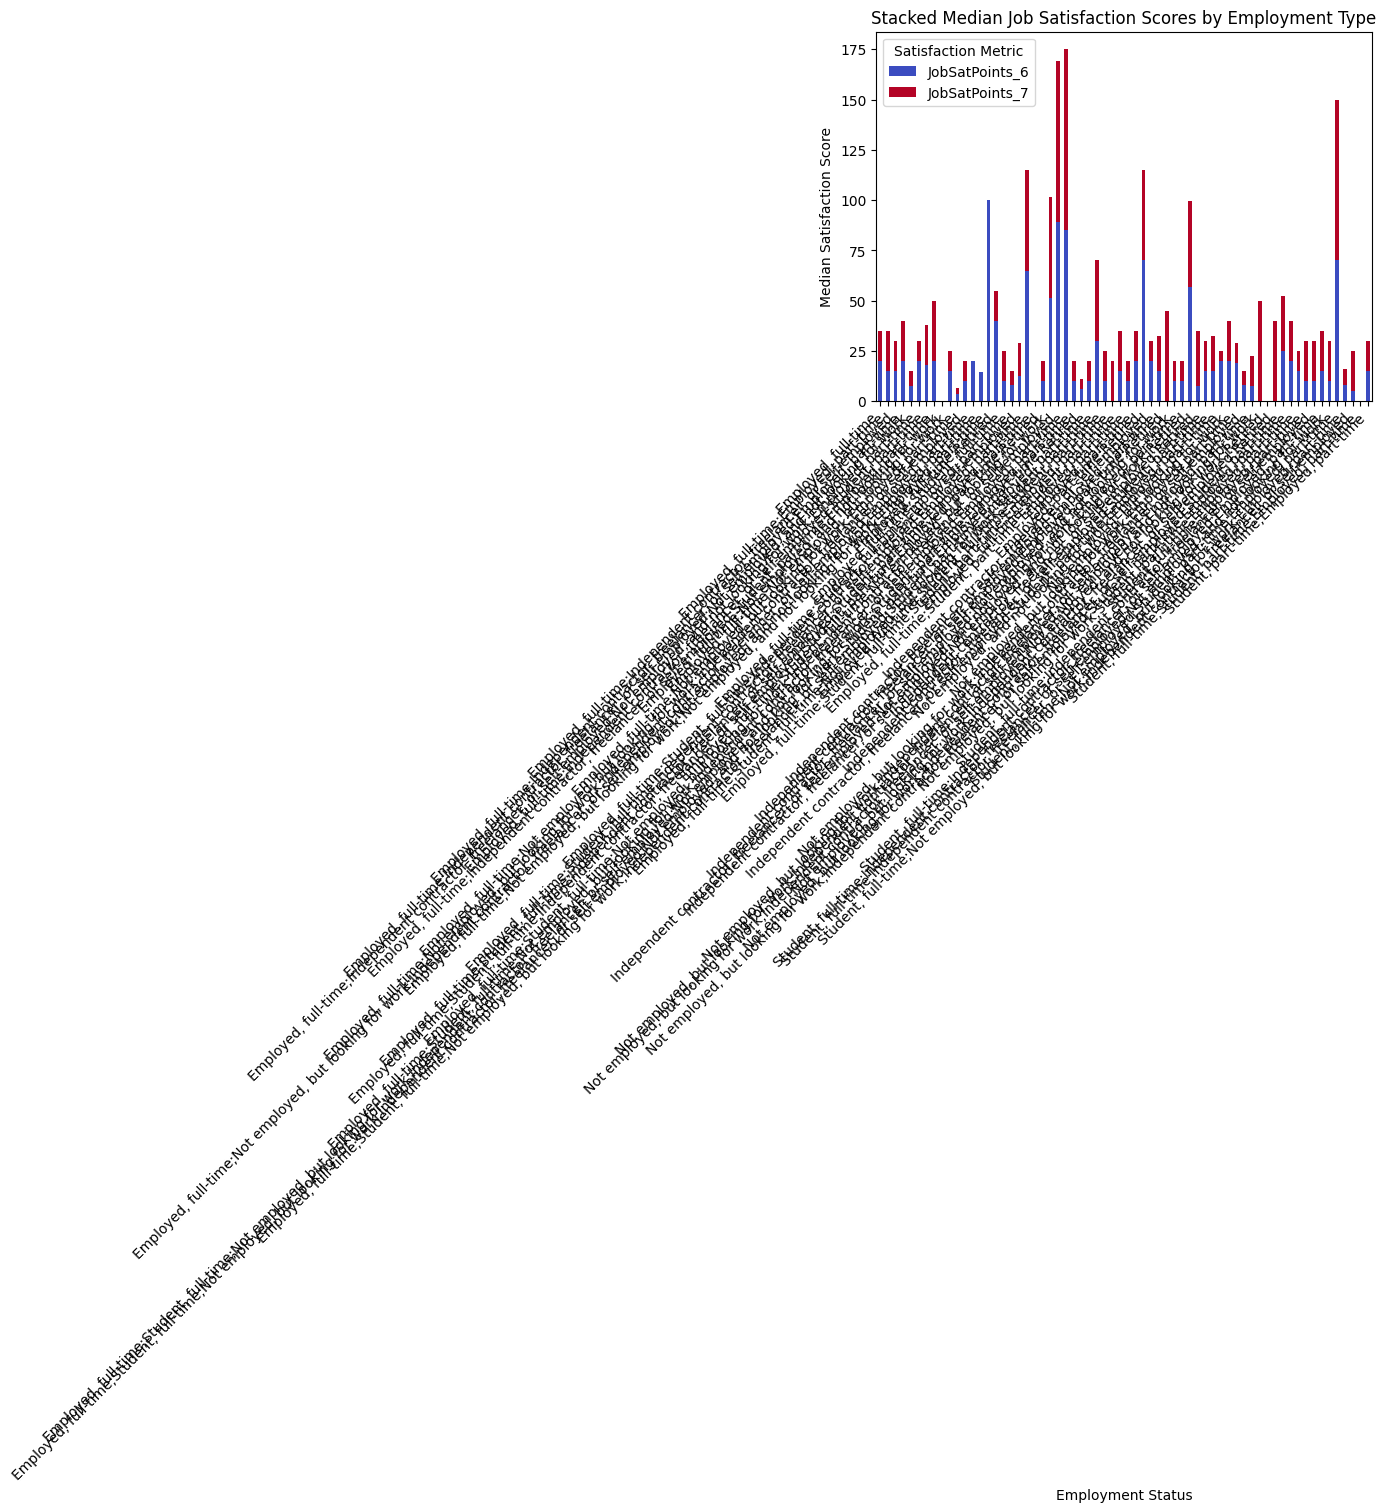

In [8]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop rows with missing values
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 2: Group by Employment and compute median satisfaction
median_satisfaction = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Step 3: Plot stacked bar chart
plt.figure(figsize=(12, 6))
median_satisfaction.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('Stacked Median Job Satisfaction Scores by Employment Type')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfaction Metric')
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


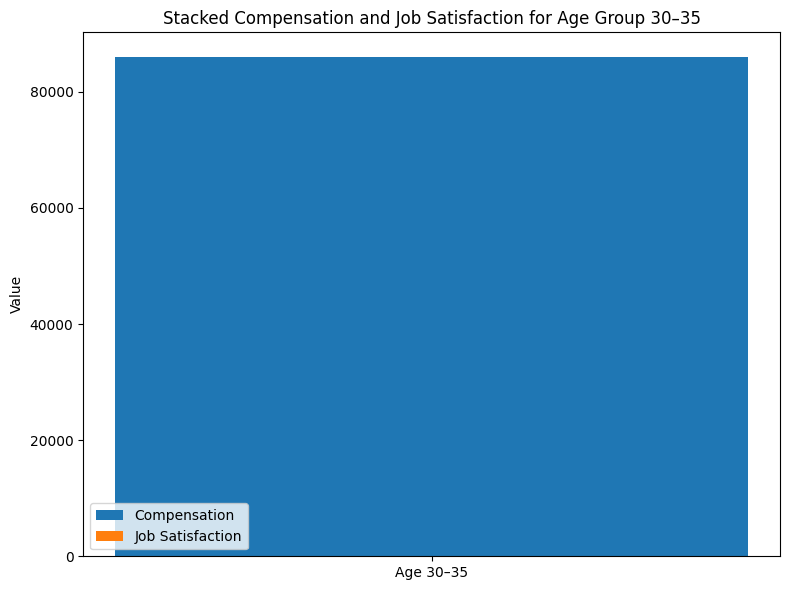

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract numeric age from 'Age' column if needed
df['AgeNumeric'] = df['Age'].str.extract(r'(\d+)')
df['AgeNumeric'] = pd.to_numeric(df['AgeNumeric'], errors='coerce')

# Step 2: Filter for age 30–35
df_filtered = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 35)]

# Step 3: Drop NaNs from relevant columns
df_filtered = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Step 4: Calculate median values
median_comp = df_filtered['ConvertedCompYearly'].median()
median_sat = df_filtered['JobSatPoints_6'].median()

# Step 5: Create DataFrame for plotting
plot_df = pd.DataFrame({
    'Age 30–35': [median_comp, median_sat]
}, index=['ConvertedCompYearly', 'JobSatPoints_6'])

# Step 6: Plot stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar('Age 30–35', plot_df.loc['ConvertedCompYearly', 'Age 30–35'], label='Compensation')
plt.bar('Age 30–35', plot_df.loc['JobSatPoints_6', 'Age 30–35'], 
        bottom=plot_df.loc['ConvertedCompYearly', 'Age 30–35'], label='Job Satisfaction')

plt.title('Stacked Compensation and Job Satisfaction for Age Group 30–35')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_3830/2332417274.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_3830/2332417274.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median().dropna()


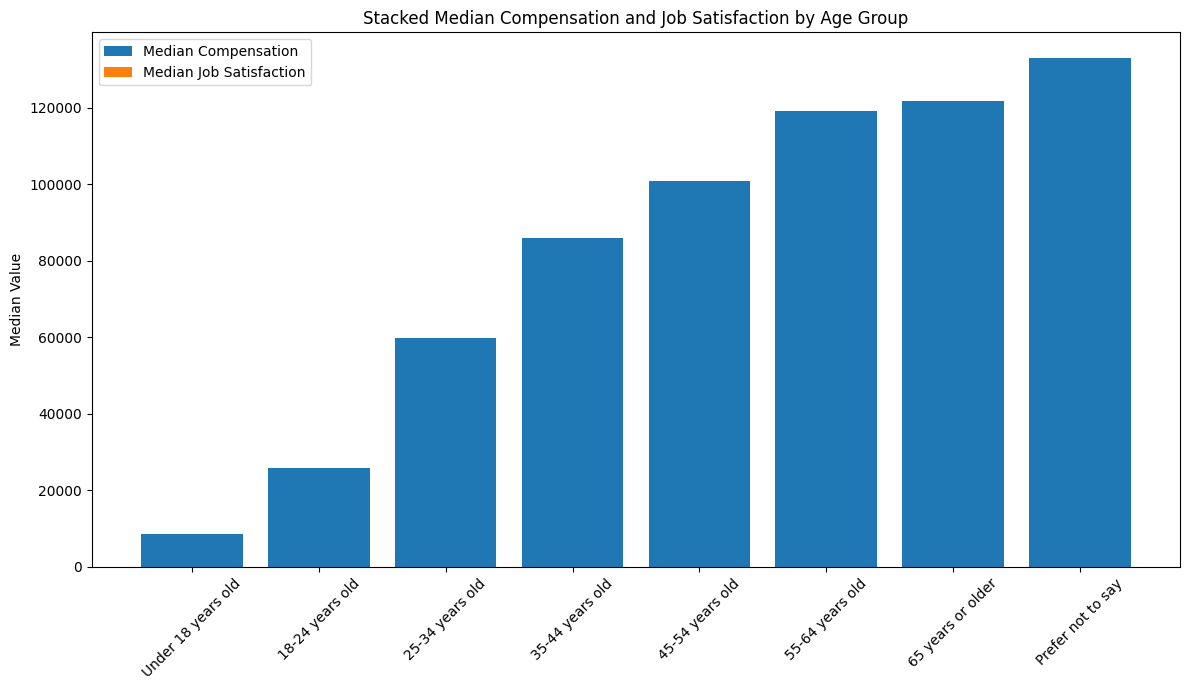

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Step 2: Convert Age column to categorical and drop NaNs
df = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Step 3: Group by Age and calculate medians
median_values = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median().dropna()

# Step 4: Plot the stacked bar chart
plt.figure(figsize=(12, 7))
plt.bar(median_values.index, median_values['ConvertedCompYearly'], label='Median Compensation')
plt.bar(median_values.index, median_values['JobSatPoints_6'], 
        bottom=median_values['ConvertedCompYearly'], label='Median Job Satisfaction')

plt.xticks(rotation=45)
plt.ylabel('Median Value')
plt.title('Stacked Median Compensation and Job Satisfaction by Age Group')
plt.legend()
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_3830/4030089510.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median().dropna()


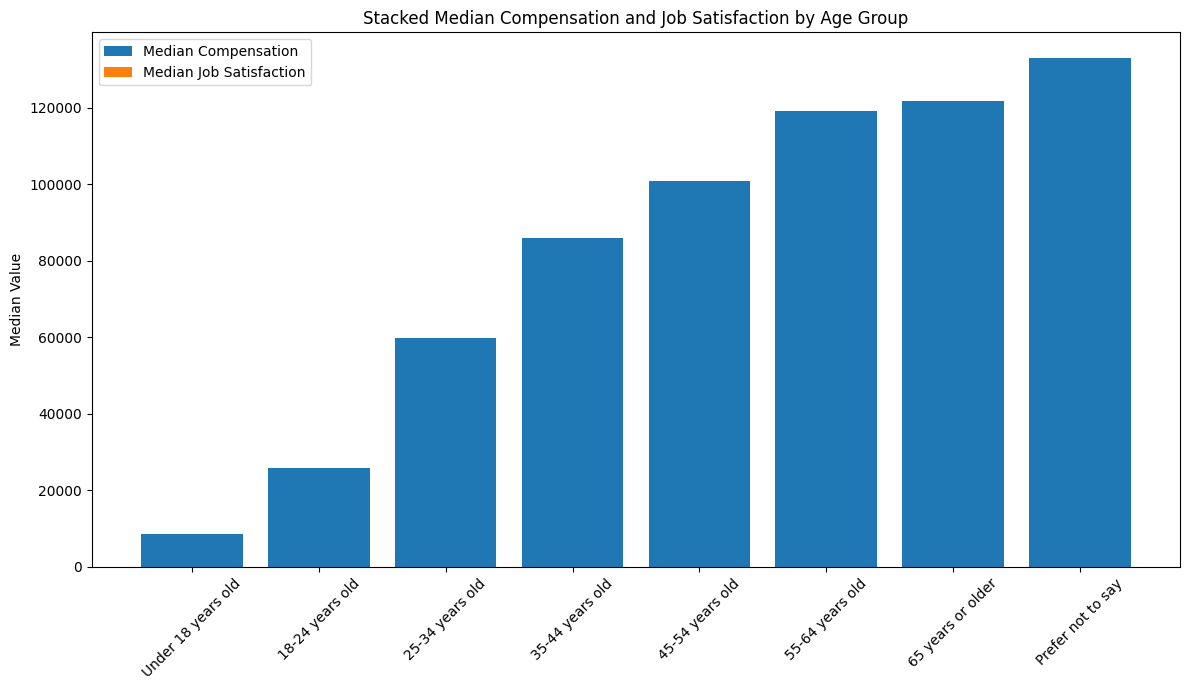

In [12]:
##Write your code here

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


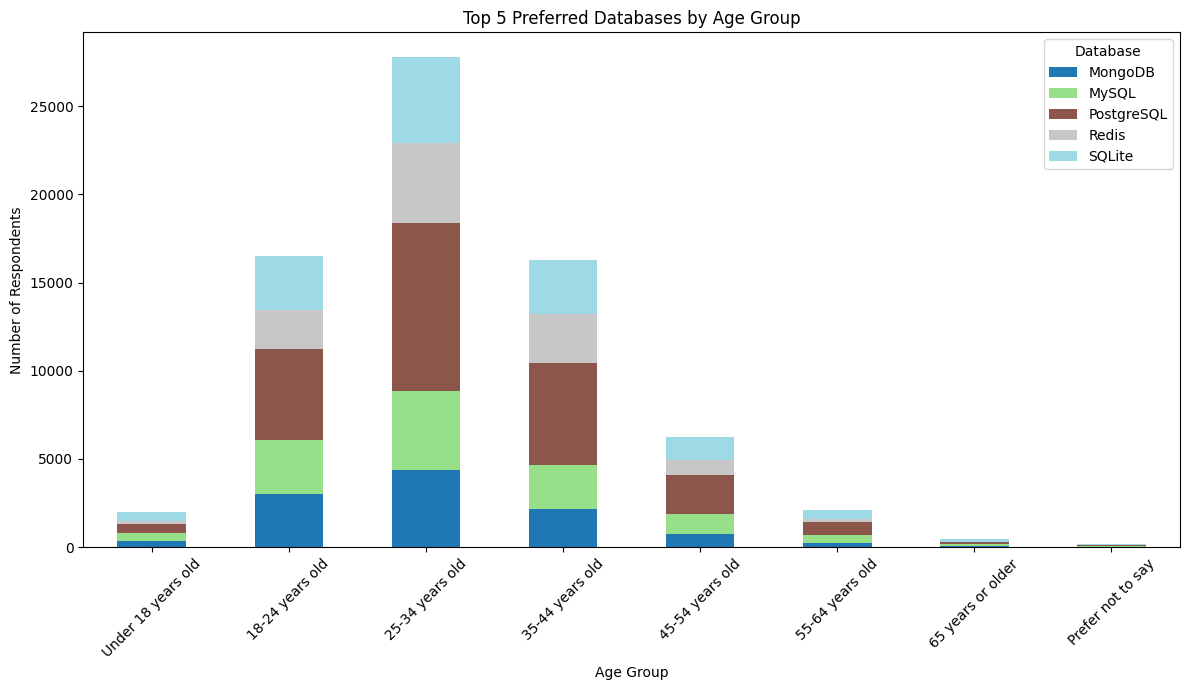

In [13]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Load data
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT Age, DatabaseWantToWorkWith FROM main WHERE Age IS NOT NULL AND DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Clean and explode
df['DatabaseList'] = df['DatabaseWantToWorkWith'].str.split(';')
df = df.explode('DatabaseList')

# Optional: Filter to top 5 databases overall
top_dbs = df['DatabaseList'].value_counts().nlargest(5).index
df = df[df['DatabaseList'].isin(top_dbs)]

# Step 3: Create cross-tab of counts
db_counts = pd.crosstab(df['Age'], df['DatabaseList'])

# Step 4: Sort age groups (optional)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]
db_counts = db_counts.reindex(age_order)

# Step 5: Plot stacked bar chart
db_counts.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Top 5 Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Database')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


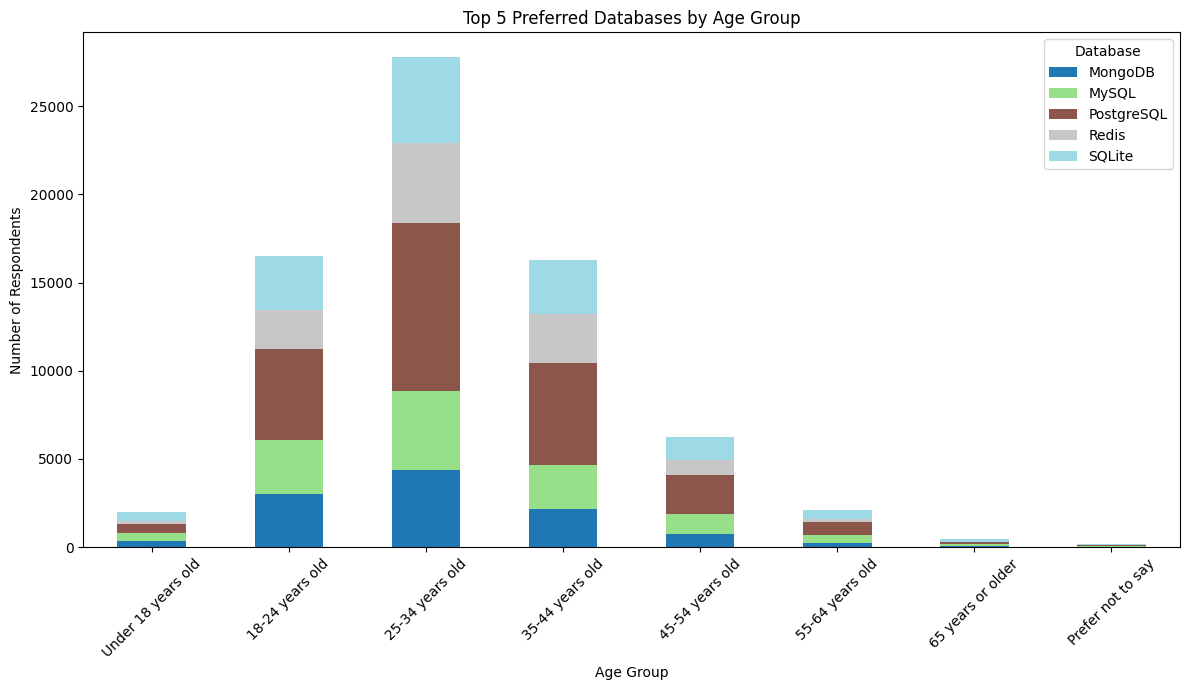

In [15]:
##Write your code here\

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
##Write your code here

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
